# NumPy进阶

参考

+ https://wizardforcel.gitbooks.io/pyda-2e/content/4.html
+ https://wizardforcel.gitbooks.io/pyda-2e/content/a.html
+ https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
+ https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure', figsize=(10, 6))

In [3]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

## 基础部分补充

### 矢量化运算

In [290]:
my_arr = np.arange(1000000)

In [291]:
my_arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [4]:
my_list = list(range(1000000))

In [292]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: total: 0 ns
Wall time: 11 ms
CPU times: total: 156 ms
Wall time: 531 ms


In [6]:
arr1 = np.array([[3.7, -1.2, 2.6], [1, 3, 4]])
arr2 = np.array([[1.2, 0, 1.0], [2,1,0]])
np.maximum(arr1, arr2)

array([[3.7, 0. , 2.6],
       [2. , 3. , 4. ]])

In [11]:
arr1 = np.array([[3.7, -1.2, 2.6], [1, 3, 4]])

In [12]:
arr1.mean()

2.183333333333333

In [13]:
arr1.mean(axis=0)

array([2.35, 0.9 , 3.3 ])

In [14]:
arr1.argmax(axis=0)

array([0, 1, 1], dtype=int64)

### 数组的类型转换

In [9]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [10]:
np.maximum(arr, arr)

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [57]:
arr.astype('int32')

array([ 3, -1, -2,  0, 12, 10])

In [58]:
arr.astype('i4')

array([ 3, -1, -2,  0, 12, 10])

In [59]:
arr.astype('?')

array([ True,  True,  True,  True,  True,  True])

In [50]:
numeric_strings = np.array(['1.25', '-9.6', '42'], 
                           dtype=np.string_)

In [51]:
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

对于字符型数组，不恰当的指定字符串长度会导致字符被截断。

In [52]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype='S2')

In [39]:
numeric_strings

array([b'1.', b'-9', b'42'], dtype='|S2')

In [13]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [14]:
numeric_strings.astype(float).dtype

dtype('float64')

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

In [11]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([3794214640,        645, 3880335056,        645,          0,
       2147483648,    6750464,   27424612], dtype=uint32)

### 布尔类型数组

In [40]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [41]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [265]:
bools = np.array([
    [False, False, True, False],
    [True, True, True, True]
])

In [267]:
bools.any()

True

In [268]:
bools.any(axis=1)

array([ True,  True])

In [270]:
bools.all(axis=1)

array([False, False])

### 基本的索引和切片

In [31]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
arr[5]

5

In [33]:
arr[5:8]

array([5, 6, 7])

In [34]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [35]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [36]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [37]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [38]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [40]:
arr2d[0][2]

3

In [41]:
arr2d[0, 2]

3

In [42]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [43]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
old_values = arr3d[0].copy()

In [45]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[1, 0]

array([7, 8, 9])

In [50]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

### 切片索引

In [51]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [52]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [54]:
arr2d[1, :2]

array([4, 5])

In [55]:
arr2d[:2, 2]

array([3, 6])

In [56]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [57]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

In [74]:
names = np.array(['Bob', 'Joe', 'Will', 
                  'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [75]:
data

array([[ 0.0009,  1.3438, -0.7135, -0.8312],
       [-2.3702, -1.8608, -0.8608,  0.5601],
       [-1.2659,  0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 , -0.9707],
       [-1.307 ,  0.2863,  0.378 , -0.7539],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [-0.0119,  1.0048,  1.3272, -0.9193]])

In [76]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [77]:
data[names == 'Bob']

array([[ 0.0009,  1.3438, -0.7135, -0.8312],
       [-2.3594, -0.1995, -1.542 , -0.9707]])

In [62]:
data[names == 'Bob', 2:]

array([[-0.5194, -0.5557],
       [ 1.3529,  0.8864]])

In [63]:
data[names == 'Bob', 3]

array([-0.5557,  0.8864])

In [64]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [65]:
data[~(names == 'Bob')]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [66]:
cond = names == 'Bob'

In [67]:
data[~cond]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [69]:
mask = (names == 'Bob') | (names == 'Will')
mask


array([ True, False,  True,  True,  True, False, False])

In [70]:
data[mask]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386]])

In [71]:
data[data < 0] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

In [72]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

## 广播

In [133]:
arr = np.arange(5)
arr
arr * 4

array([ 0,  4,  8, 12, 16])

In [151]:
arr = np.random.randn(4, 3)
arr

array([[ 1.5777,  0.1611, -1.5929],
       [-0.2517, -0.4474,  1.2534],
       [-0.6305,  0.7346, -1.3853],
       [ 0.6166,  0.4716,  0.1801]])

In [152]:
column_mean = arr.mean(axis=0)
column_mean

array([ 0.328 ,  0.23  , -0.3862])

In [153]:
column_mean.shape

(3,)

In [154]:
demeaned = arr - arr.mean(axis=0)
demeaned

array([[ 1.2497, -0.0689, -1.2067],
       [-0.5797, -0.6774,  1.6396],
       [-0.9585,  0.5046, -0.9991],
       [ 0.2886,  0.2416,  0.5663]])

In [155]:
demeaned.mean(axis=0)

array([0., 0., 0.])

In [160]:
arr

array([[ 1.5777,  0.1611, -1.5929],
       [-0.2517, -0.4474,  1.2534],
       [-0.6305,  0.7346, -1.3853],
       [ 0.6166,  0.4716,  0.1801]])

### 沿其它轴向广播

In [161]:
row_mean = arr.mean(axis=1)
row_mean.shape

(4,)

In [162]:
row_mean.reshape((4, 1))

array([[ 0.0486],
       [ 0.1847],
       [-0.4271],
       [ 0.4227]])

In [166]:
demeaned = arr - row_mean.reshape((4, 1))
demeaned

array([[ 1.5291,  0.1125, -1.6415],
       [-0.4365, -0.6321,  1.0686],
       [-0.2034,  1.1617, -0.9582],
       [ 0.1938,  0.0488, -0.2427]])

In [167]:
demeaned.mean(axis=1)

array([ 0.,  0., -0., -0.])

### 通过索引机制插入轴

In [179]:
arr_1d = np.random.normal(size=3)
arr_1d

array([-0.7426,  0.8544,  1.0839])

In [180]:
arr_1d[:, np.newaxis].shape

(3, 1)

In [182]:
arr_1d[:, np.newaxis]

array([[-0.7426],
       [ 0.8544],
       [ 1.0839]])

In [183]:
arr_1d[np.newaxis, :].shape

(1, 3)

In [184]:
arr_1d[np.newaxis, :]

array([[-0.7426,  0.8544,  1.0839]])

In [170]:
arr = np.zeros((4, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [171]:
arr_3d = arr[:, np.newaxis, :]
arr_3d

array([[[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]]])

In [172]:
arr_3d.shape

(4, 1, 4)

In [187]:
arr = np.random.randn(3, 4, 5)
arr

array([[[-1.3181,  1.8289,  1.6739,  0.8665,  0.6979],
        [-0.3272,  2.11  ,  0.3175, -0.6971,  0.7475],
        [-1.385 ,  1.1389,  0.2016,  0.6744,  1.6366],
        [ 1.3743,  0.337 ,  0.4853, -0.7615, -0.4414]],

       [[ 1.1291, -0.4877,  0.51  ,  1.282 , -0.7154],
        [-0.5768, -0.734 ,  2.0851, -1.2594,  0.2649],
        [-2.1169,  0.3475,  0.3156,  2.8779,  1.0385],
        [-0.992 ,  1.7024,  0.2332, -0.7327,  0.4347]],

       [[-1.2868,  1.3091, -1.5402,  0.0593, -0.6716],
        [-0.1131, -0.258 ,  1.1906,  0.8892, -1.4934],
        [ 0.5092, -0.4886,  0.2226,  1.0761,  0.709 ],
        [-0.4053, -0.5407, -1.8353,  2.3576,  0.4572]]])

In [188]:
depth_means = arr.mean(axis=2)
depth_means

array([[ 0.7498,  0.4301,  0.4533,  0.1987],
       [ 0.3436, -0.044 ,  0.4925,  0.1291],
       [-0.4261,  0.0431,  0.4057,  0.0067]])

In [189]:
depth_means.shape

(3, 4)

In [190]:
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)

array([[-0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.],
       [-0.,  0.,  0., -0.]])

### 通过广播设置数组的值

In [191]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [193]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [194]:
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

## 花式索引

In [229]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [93]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [95]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [96]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [97]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [98]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 花式索引的等价函数: take 与 put

In [243]:
arr = np.arange(10) * 100
inds = [7, 1, 2, 6]
arr[inds]

array([700, 100, 200, 600])

In [244]:
arr.take(inds)

array([700, 100, 200, 600])

In [247]:
arr.put(inds, 42)
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [248]:
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [249]:
inds = [2, 0, 2, 1]
arr = np.random.randn(2, 4)
arr

array([[ 0.1811, -1.041 , -0.3766,  0.3005],
       [ 0.1759, -0.4682,  1.0509,  0.3593]])

In [250]:
arr.take(inds, axis=1)

array([[-0.3766,  0.1811, -0.3766, -1.041 ],
       [ 1.0509,  0.1759,  1.0509, -0.4682]])

## 切片函数

In [251]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [252]:
arr[:3, 2:4]

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

In [253]:
indexer = (slice(None,3), slice(2,4))

In [254]:
arr[indexer]

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

In [256]:
indexer = (slice(None,3), [1,2,3])
arr[indexer]

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.]])

In [257]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)

    # This generalizes things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[tuple(indexer)]


In [258]:
arr_3d = np.random.randn(3, 4, 5)
demean_axis(arr_3d, 1)

array([[[ 0.5613,  0.9253, -0.4569,  0.4728, -1.3846],
        [-0.569 ,  1.5201,  0.0988, -0.9834,  0.3958],
        [ 0.353 , -0.6753, -1.1929,  2.1269,  0.8311],
        [-0.3453, -1.7702,  1.5511, -1.6163,  0.1577]],

       [[ 0.411 ,  0.2451, -0.8864, -1.0262, -0.4022],
        [ 1.0871, -0.0829,  1.9129,  0.6638, -0.2693],
        [-0.7214,  0.0864, -0.5198,  0.9193,  0.4997],
        [-0.7767, -0.2487, -0.5067, -0.5569,  0.1718]],

       [[-0.0678, -1.446 ,  0.6362,  0.5522, -0.4239],
        [-1.0453,  0.0401,  0.0924, -0.4713,  0.2126],
        [ 0.7089, -0.078 , -0.23  ,  0.2017, -0.0181],
        [ 0.4041,  1.4839, -0.4987, -0.2825,  0.2293]]])

## 将条件逻辑表述为数组运算

In [99]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [100]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [101]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [272]:
arr = np.random.randn(4, 4)
arr

array([[ 0.7339, -0.084 , -1.1328, -0.319 ],
       [ 0.4951, -1.3924,  0.6453, -0.4294],
       [-0.1353, -0.8959,  0.9189,  0.1241],
       [ 0.6162,  0.514 ,  0.8706, -1.5999]])

In [273]:
arr > 0

array([[ True, False, False, False],
       [ True, False,  True, False],
       [False, False,  True,  True],
       [ True,  True,  True, False]])

In [274]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [ 2, -2,  2, -2],
       [-2, -2,  2,  2],
       [ 2,  2,  2, -2]])

In [275]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    , -0.084 , -1.1328, -0.319 ],
       [ 2.    , -1.3924,  2.    , -0.4294],
       [-0.1353, -0.8959,  2.    ,  2.    ],
       [ 2.    ,  2.    ,  2.    , -1.5999]])

In [276]:
arr = np.random.randn(100)

In [277]:
(arr > 0).sum() # Number of positive values

44

## 随机数生成

In [107]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.1686, -0.825 , -2.6444, -0.153 ],
       [-0.7519, -0.1326,  1.4573,  0.6095],
       [-0.4938,  1.24  , -0.1357,  1.43  ],
       [-0.8469,  0.6033,  1.2636, -0.2555]])

In [108]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

506 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.4 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [109]:
np.random.seed(1234)

In [110]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## 示例: 随机漫步

In [124]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [128]:
walk[:10]

[0, -1, 0, 1, 0, 1, 2, 3, 2, 3]

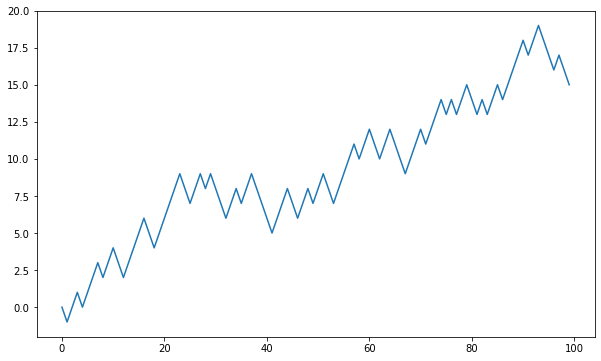

In [126]:
plt.plot(walk[:100])

In [129]:
np.random.seed(12345)

In [115]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [116]:
walk.min()
walk.max()

31

In [117]:
(np.abs(walk) >= 10).argmax()

37

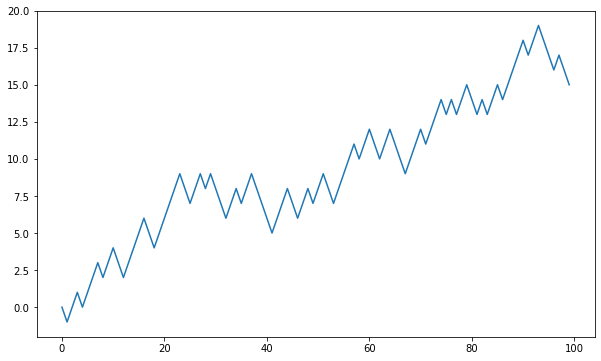

In [130]:
plt.plot(walk[:100])

### 一次模拟多个随机漫步

In [131]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[ -1,   0,   1, ...,  12,  13,  14],
       [  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       ...,
       [ -1,  -2,  -1, ..., -16, -17, -18],
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14]], dtype=int32)

In [132]:
walks.max()
walks.min()

-133

首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。

计算达到距离30或-30的最小首次穿越时间

In [278]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ..., False, False,  True])

In [120]:
hits30.sum() # Number that hit 30 or -30

3410

In [279]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [280]:
crossing_times

array([909, 735, 409, ..., 327, 453, 447], dtype=int64)

In [121]:
crossing_times.mean()

498.8897360703812

## 求两两距离

来源：https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html

给定两个2D数组A和B，计算A中的每个行向量和B中的每个行向量的欧氏距离。

对于向量$x$和$y$，欧氏距离定义为

\begin{equation}
\sqrt{(x_{0} - y_{0})^2 + (x_{1} - y_{1})^2 + \ldots + (x_{D-1} - y_{D-1})^2} = \sqrt{\sum_{i=0}^{D-1}{(x_{i} - y_{i})^2}}
\end{equation}

In [283]:
x = np.array([[ 8.54,  1.54,  8.12],
              [ 3.13,  8.76,  5.29],
              [ 7.73,  6.71,  1.31],
              [ 6.44,  9.64,  8.44],
              [ 7.27,  8.42,  5.27]])

In [285]:
x.shape

(5, 3)

In [286]:
y = np.array([[ 8.65,  0.27,  4.67],
              [ 7.73,  7.26,  1.95],
              [ 1.27,  7.27,  3.59],
              [ 4.05,  5.16,  3.53],
              [ 4.77,  6.48,  8.01],
              [ 7.85,  6.68,  6.13]])

In [287]:
y.shape

(6, 3)

利用公式将计算分解为三步

\begin{equation}
\sum_{i=0}^{D-1}{(x_{i} - y_{i})^2} = \sum_{i=0}^{D-1}{x_{i}^2} + \sum_{i=0}^{D-1}{y_{i}^2} - 2\sum_{i=0}^{D-1}{x_{i} y_{i}}
\end{equation}

1. 对每一对$(x,y)$，求$- 2\sum_{i=0}^{D-1}{x_{i} y_{i}}$
2. 对每一个$x$，求$\sum_{i=0}^{D-1}{x_{i}^2}$
3. 对每一个$y$, 求$\sum_{i=0}^{D-1}{y_{i}^2}$

最后，需要将三项组合到一起

In [288]:
def pairwise_dists(x, y):
    """ Computing pairwise distances using memory-efficient
    vectorization.

    Parameters
    ----------
    x : numpy.ndarray, shape=(M, D)
    y : numpy.ndarray, shape=(N, D)

    Returns
    -------
    numpy.ndarray, shape=(M, N)
        The Euclidean distance between each pair of
        rows between `x` and `y`."""
    sqr_dists = -2 * np.matmul(x, y.T) # shape [M, N]
    sqr_dists +=  np.sum(x**2, axis=1)[:, np.newaxis] # shape [M, 1]
    # now, `sqr_dists` is of shape [M, N]
    sqr_dists += np.sum(y**2, axis=1) # shape [N,], broadcasted as [1, N]
    # now, `sqr_dists` is of shape [M, N]
    return  np.sqrt(np.clip(sqr_dists, a_min=0, a_max=None))

In [289]:
pairwise_dists(x, y)

array([[ 3.678 ,  8.4524, 10.3057,  7.3711,  6.2152,  5.5548],
       [10.1457,  5.8793,  2.9274,  4.1114,  3.9098,  5.2259],
       [ 7.3219,  0.8439,  6.8734,  4.5687,  7.3283,  4.8216],
       [10.339 ,  7.032 ,  7.4745,  7.0633,  3.5999,  4.0107],
       [ 8.2878,  3.5468,  6.336 ,  4.9014,  4.1858,  2.0257]])